In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("cropYield_df.csv")

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [14]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [16]:
df.duplicated().sum()

2310

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [22]:
df.shape

(25932, 7)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [18]:
# Filter only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091630   
hg/ha_yield                    0.091630     1.000000   
average_rain_fall_mm_per_year -0.003798     0.000962   
pesticides_tonnes              0.140930     0.064085   
avg_temp                       0.014409    -0.114777   

                               average_rain_fall_mm_per_year  \
Year                                               -0.003798   
hg/ha_yield                                         0.000962   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.180984   
avg_temp                                            0.313040   

                               pesticides_tonnes  avg_temp  
Year                                    0.140930  0.014409  
hg/ha_yield                             0.064085 -0.114777  
average_rain_fall_mm_per_year           0.180984  0.313040  
pesticides_tonnes                 

In [32]:
#Data Visualization

In [26]:
len(df['Area'].unique())

101

In [28]:
len(df['Item'].unique())

10

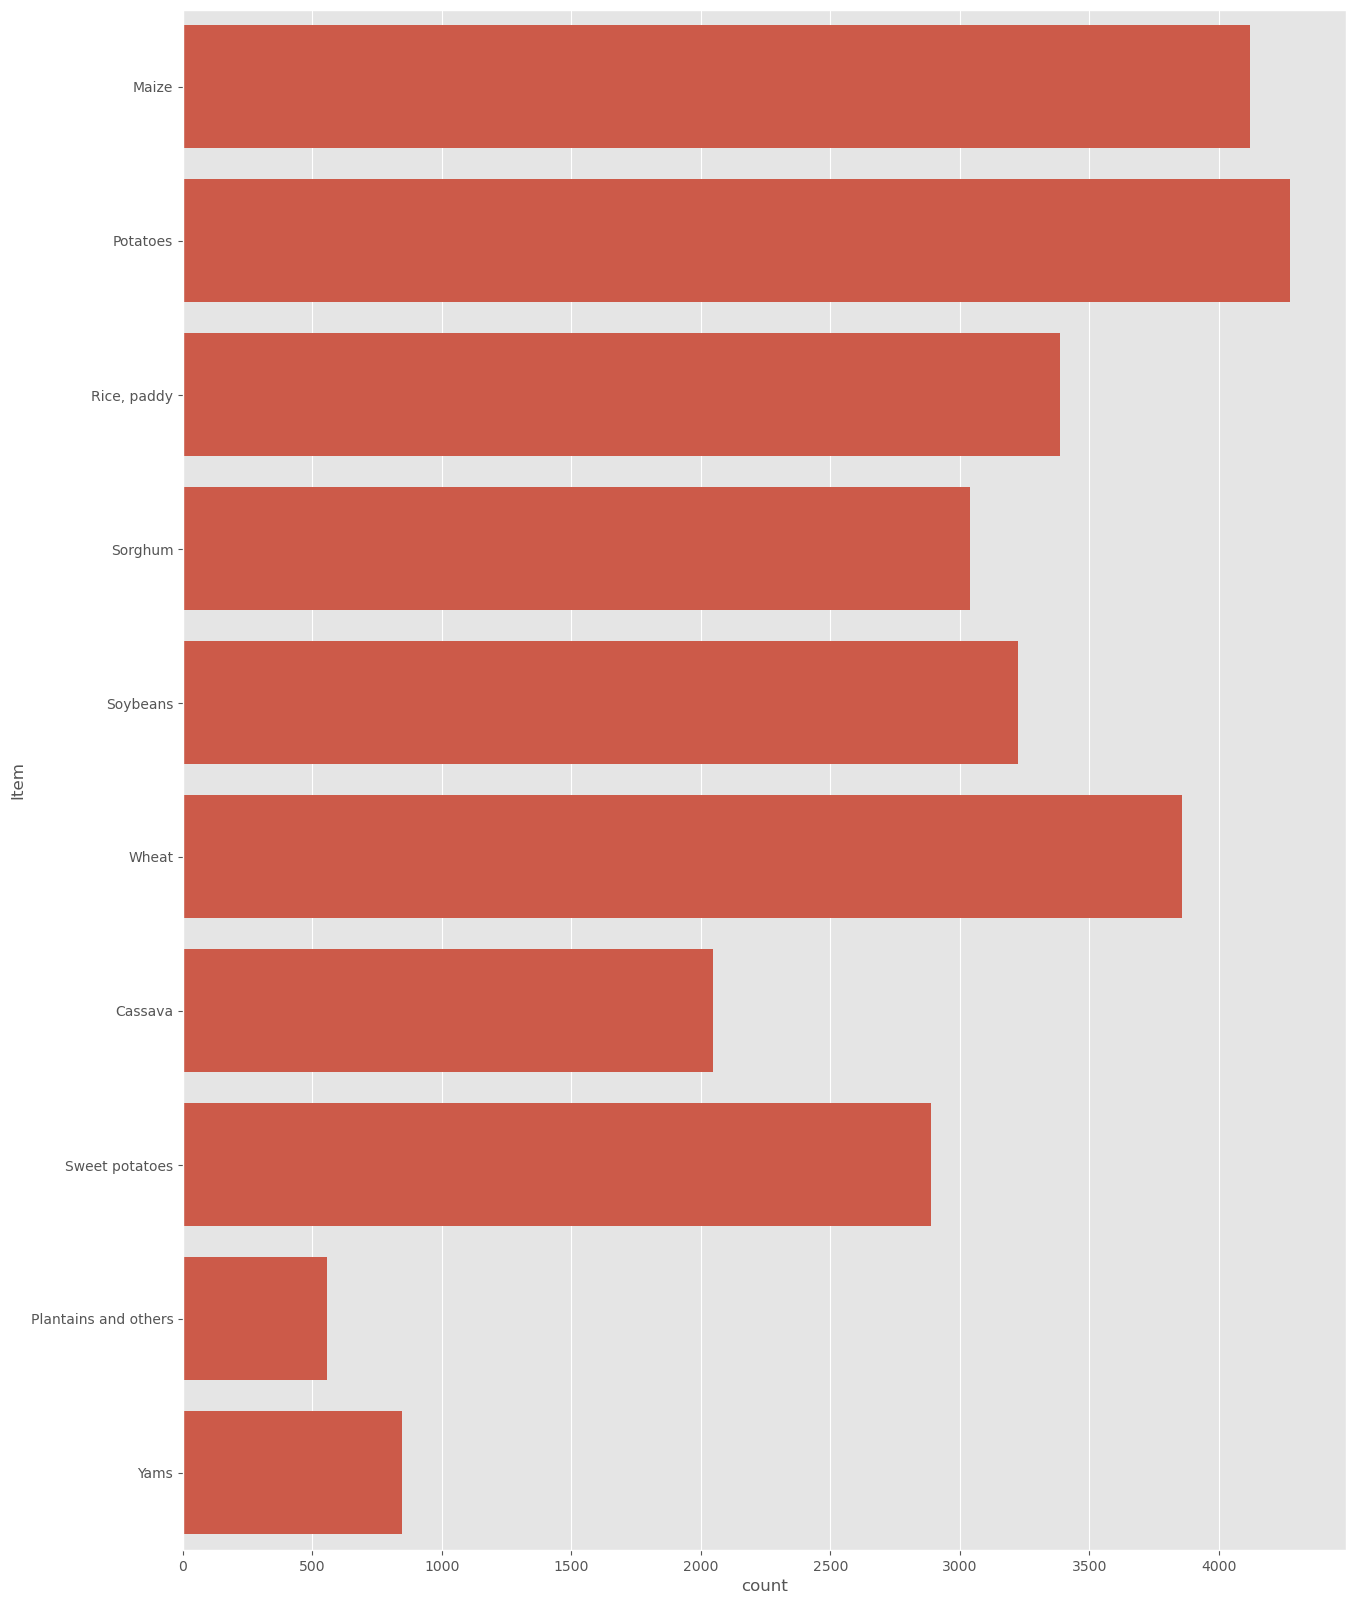

In [20]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [20]:
(df['Area'].value_counts()<400).sum()

88

In [22]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [24]:
df['hg/ha_yield'].sum()

2176140205

In [26]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 15440318,
 4704812,
 8442270,
 470651,
 167550306,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 327420324,
 69193506,
 10984722,
 9104030,
 32280700,
 19698007,
 124470912,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 130788528,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 73897434,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 41333132,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,


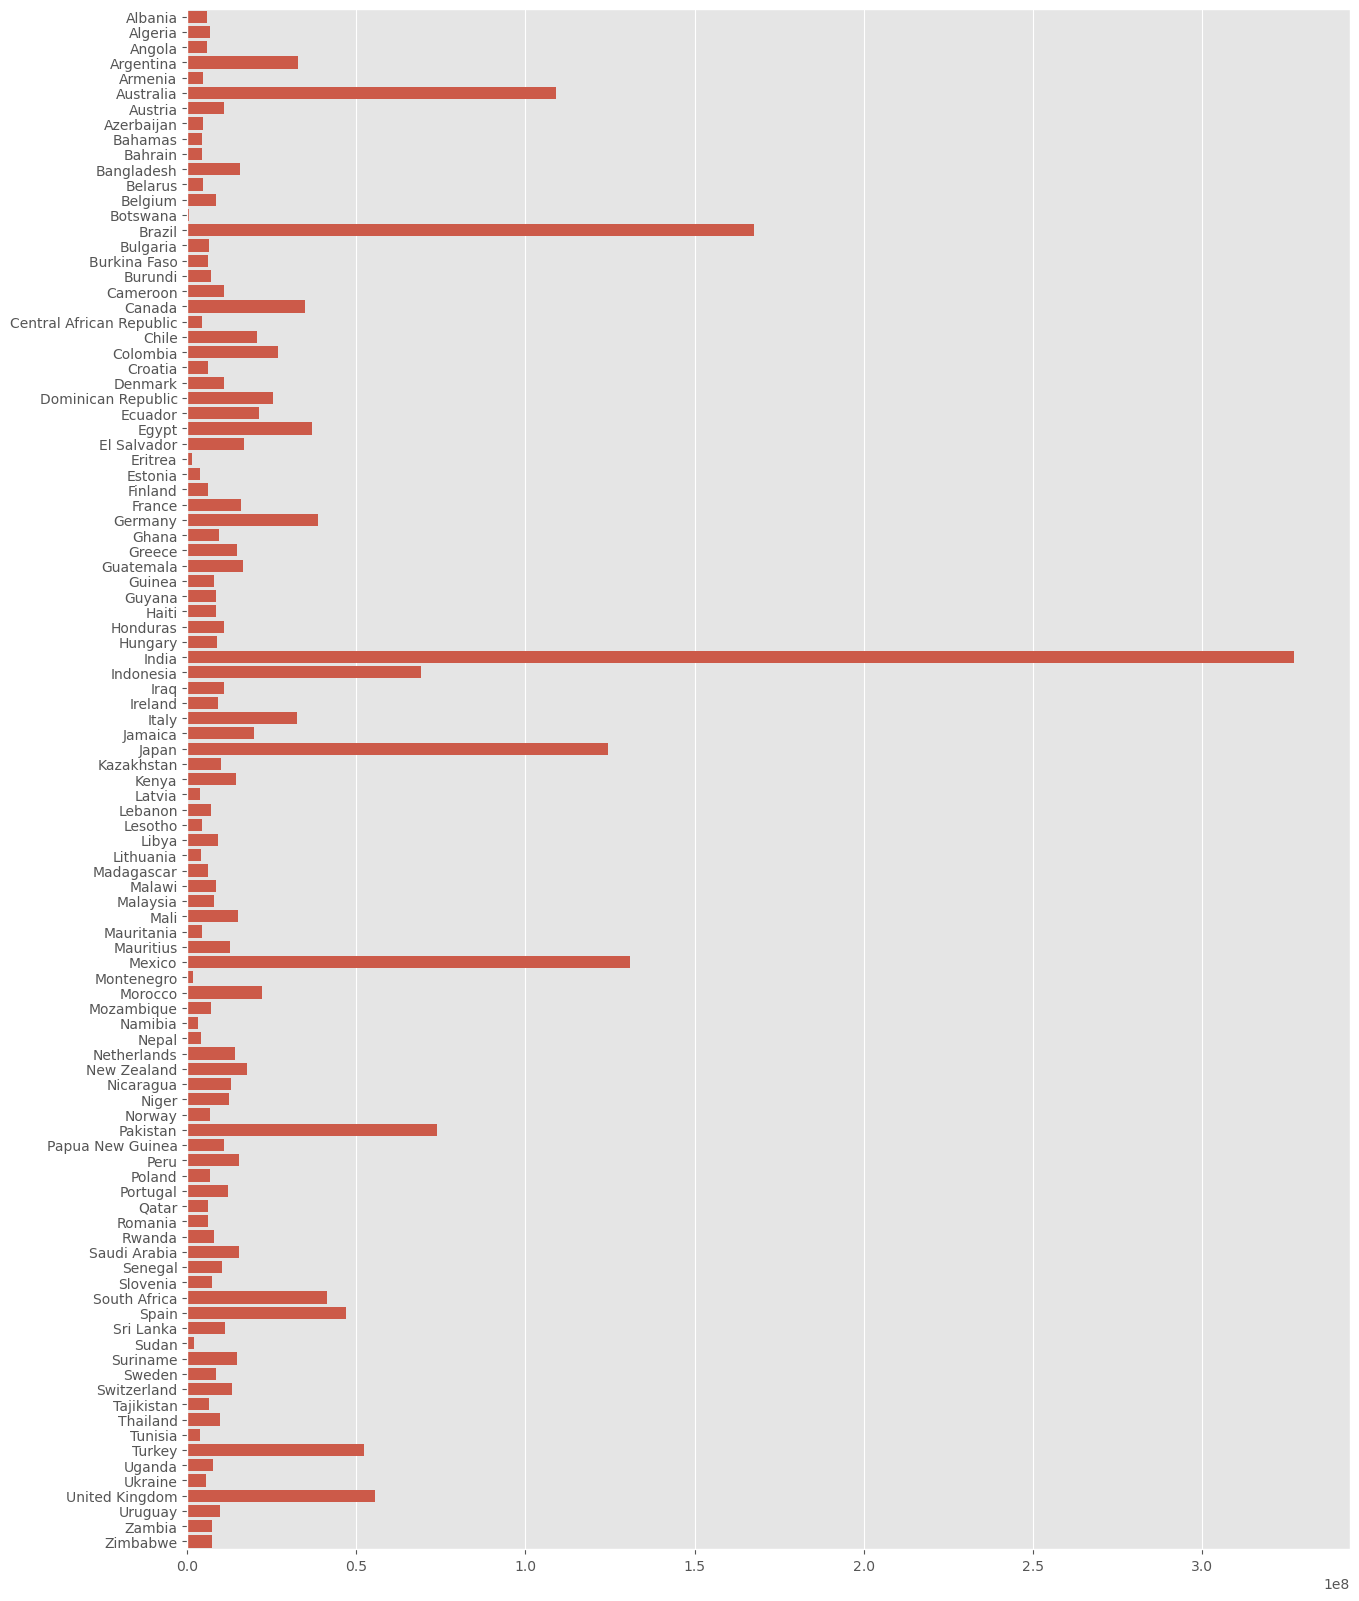

In [28]:
plt.figure(figsize = (15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [28]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

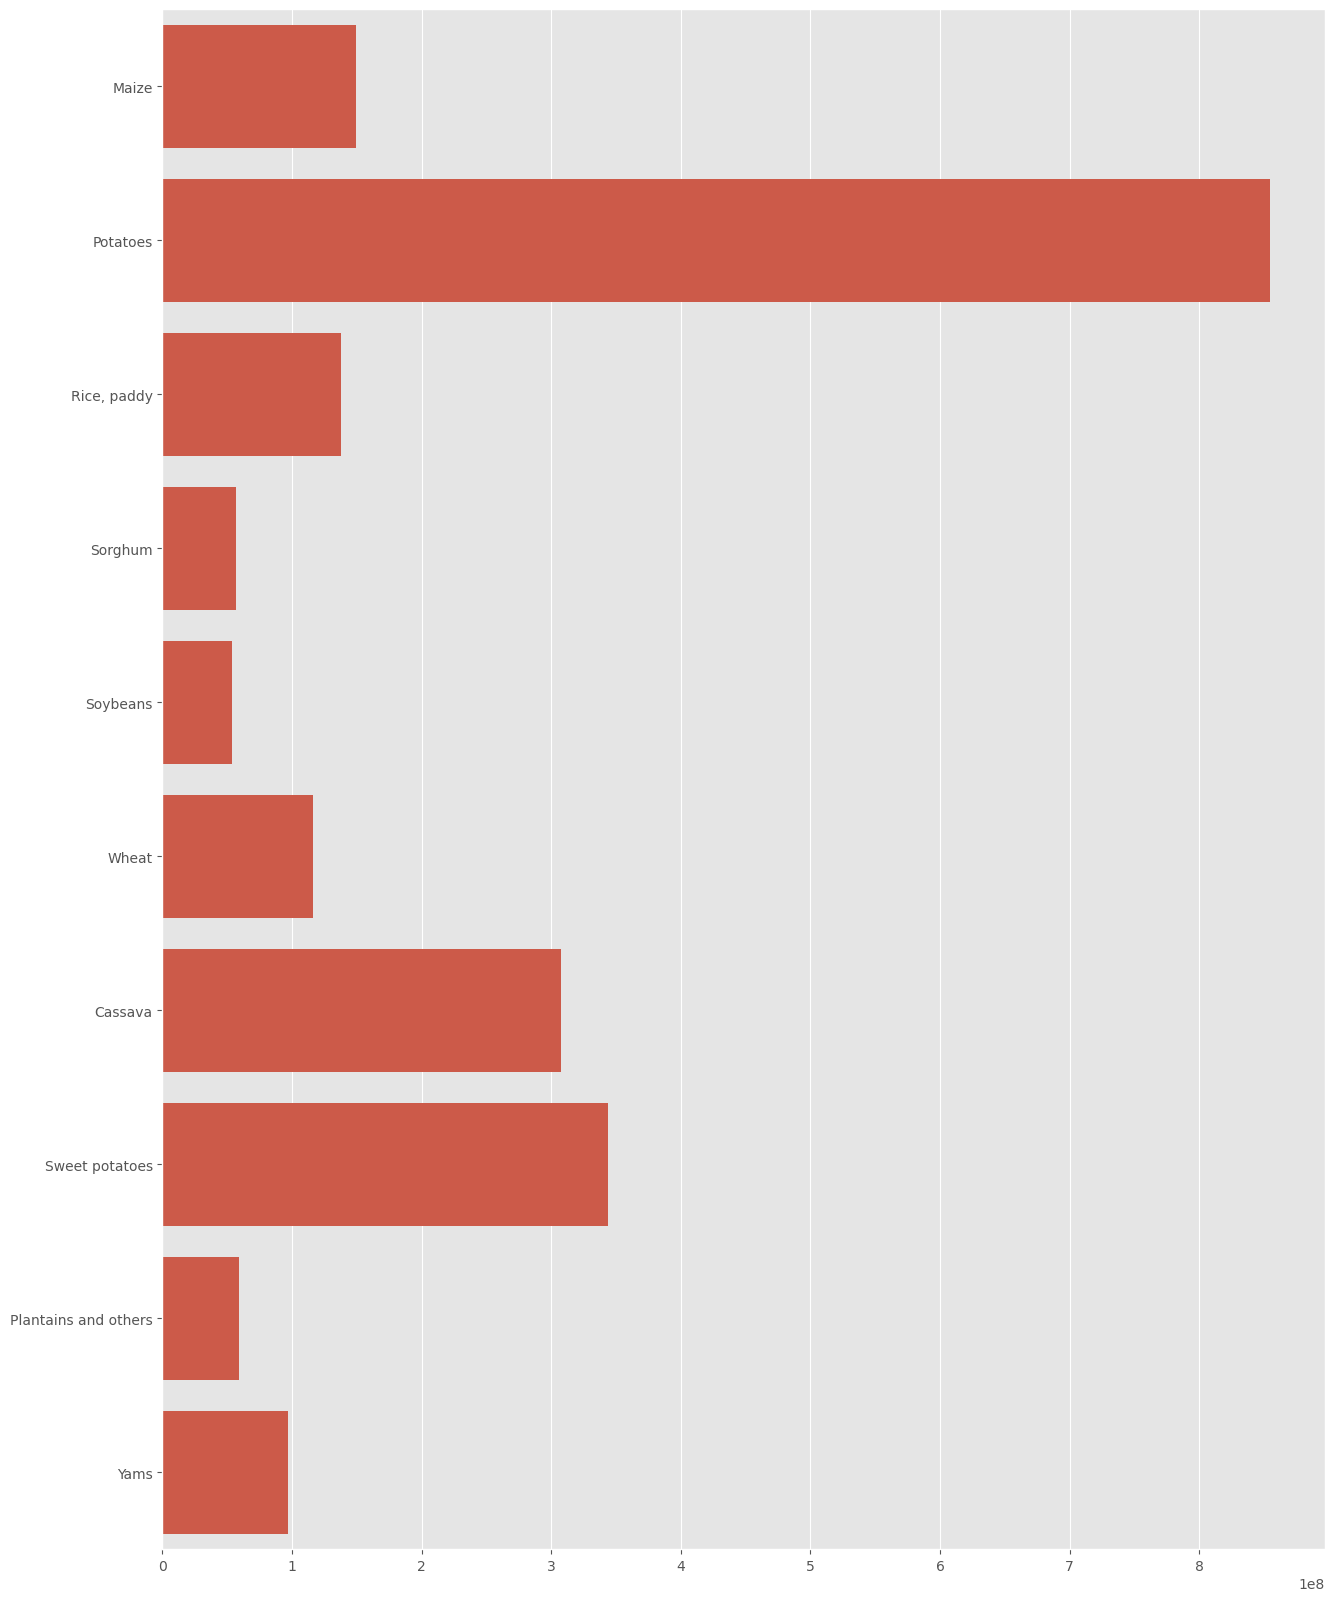

In [32]:

plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [34]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [30]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [32]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']


In [34]:
df = df[col]

In [36]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [38]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [40]:
X.shape

(28242, 6)

In [42]:
y.shape

(28242,)

In [44]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import joblib

In [78]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using 

In [47]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [52]:
pip install gymnasium==1.0.0

  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
Using cached gymnasium-1.0.0-py3-none-any.whl (958 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0 which is incompatible.


In [54]:
print(gym.__version__)

NameError: name 'gym' is not defined

In [58]:
pip install stable-baselines3

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.29.1 which is incompatible.


In [60]:
from stable_baselines3 import DQN  # For Deep Q-Learning
import stable_baselines3

print(stable_baselines3.__version__)

2.3.2


In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from stable_baselines3 import DQN  # For Deep Q-Learning
from gym import spaces, Env
import tensorflow as tf

In [64]:
# Step 3: Preprocessing (Scaling the Features)
X = df.drop('hg/ha_yield', axis=1).values
y = df['hg/ha_yield'].values

In [66]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [68]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [70]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [72]:
df = df[col]

In [67]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [74]:
# Separate features and target variable
X = df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

In [76]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['Area', 'Item'])

In [78]:
# Scale numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded.values)

In [80]:
# Reshape data for LSTM (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

In [82]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
# Define LSTM model
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13035783168.0000 - val_loss: 13185914880.0000
Epoch 2/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13475252224.0000 - val_loss: 13181634560.0000
Epoch 3/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13120386048.0000 - val_loss: 13177435136.0000
Epoch 4/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13496459264.0000 - val_loss: 13173280768.0000
Epoch 5/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13047820288.0000 - val_loss: 13169132544.0000
Epoch 6/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12881178624.0000 - val_loss: 13164984320.0000
Epoch 7/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12811649024.0000 - val_loss: 13160849408.0000
Epoch 8/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12827005952.0000 - val_loss: 13156748288.0000
Epoch 9/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13072232448.0000 - val_loss: 13152636928.0000
Epoch 10/100
707/707 ━━━━━━━━━━━━━━━━

In [86]:
from gym import spaces, Env
import tensorflow as tf

In [88]:
import gym
from gym import spaces

In [96]:
# Define DRL Environment compatible with Gym
class YieldPredictionEnv(gym.Env):
    def __init__(self):
        super(YieldPredictionEnv, self).__init__()
        
        # Define the action space and observation space according to your requirements
        self.action_space = spaces.Discrete(2)  # Actions could represent parameter tuning choices, etc.
        self.observation_space = spaces.Box(low=0, high=1, shape=(X_train.shape[1], X_train.shape[2]), dtype=np.float32)
        
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return X_train[self.current_step]  # Return initial observation

    def step(self, action):
        # Get current observation
        obs = X_train[self.current_step]
        
        # Calculate reward (based on difference from actual yield)
        prediction = lstm_model.predict(np.expand_dims(obs, axis=0))[0]
        reward = -abs(prediction - y_train.values[self.current_step])  # Reward based on prediction error
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(X_train)
        
        return obs, reward, done, {}

In [70]:
pip install shimmy

   ---------------------------------------- 0.0/958.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/958.1 kB ? eta -:--:--
   - ------------------------------------- 41.0/958.1 kB 487.6 kB/s eta 0:00:02
   - ------------------------------------- 41.0/958.1 kB 487.6 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/958.1 kB 297.7 kB/s eta 0:00:04
   --- ----------------------------------- 92.2/958.1 kB 403.5 kB/s eta 0:00:03
   ----- -------------------------------- 143.4/958.1 kB 500.5 kB/s eta 0:00:02
   ------ ------------------------------- 174.1/958.1 kB 583.1 kB/s eta 0:00:02
   ------ ------------------------------- 174.1/958.1 kB 583.1 kB/s eta 0:00:02
   -------- ----------------------------- 225.3/958.1 kB 529.7 kB/s eta 0:00:02
   ----------- -------------------------- 286.7/958.1 kB 631.2 kB/s eta 0:00:02
   ------------- ------------------------ 348.2/958.1 kB 696.7 kB/s eta 0:00:01
   ----------------- -------------------- 450.6/958.1 kB 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0 which is incompatible.


In [98]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

In [100]:
# Define LSTM model
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 13035758592.0000 - val_loss: 13185905664.0000
Epoch 2/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13155366912.0000 - val_loss: 13181626368.0000
Epoch 3/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13091329024.0000 - val_loss: 13177432064.0000
Epoch 4/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13241677824.0000 - val_loss: 13173280768.0000
Epoch 5/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13240018944.0000 - val_loss: 13169128448.0000
Epoch 6/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13029494784.0000 - val_loss: 13164991488.0000
Epoch 7/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13055656960.0000 - val_loss: 13160862720.0000
Epoch 8/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13136905216.0000 - val_loss: 13156736000.0000
Epoch 9/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13306942464.0000 - val_loss: 13152609280.0000
Epoch 10/100
707/707 ━━━━━━━━━━━━━━━━

In [102]:
# Define custom YieldPredictionEnv using Gymnasium
class YieldPredictionEnv(gym.Env):
    def __init__(self):
        super(YieldPredictionEnv, self).__init__()
        # Set the action space to be discrete (for example, 0 or 1)
        self.action_space = spaces.Discrete(2)  # Two actions: 0 and 1
        self.observation_space = spaces.Box(low=0, high=1, shape=(X_train.shape[1],), dtype=np.float32)
        self.state = np.zeros((X_train.shape[1],))  # Initial state setup
        self.current_step = 0  # Track the number of steps

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = np.zeros((X_train.shape[1],))  # Reset state to initial
        self.current_step = 0  # Reset step counter
        return self.state, {}  # Return initial observation and empty info dictionary

    def step(self, action):
        # Update the state based on the action
        if action == 0:
            self.state += 0.1  # Action 0 increases state
        else:
            self.state -= 0.1  # Action 1 decreases state

        # Ensure the state remains within bounds
        self.state = np.clip(self.state, 0, 1)

        # Example reward logic: calculate reward based on current state
        reward = self.calculate_reward(self.state)

        # Example termination condition
        self.current_step += 1
        done = self.current_step >= 100  # End after 100 steps (adjust as needed)

        # New: adding truncated condition (if applicable)
        truncated = False  # Implement your own logic if necessary

        info = {}  # Additional information can be added here
        return self.state, reward, done, truncated, info  # Return five values

    def calculate_reward(self, state):
        # Implement your reward calculation logic here
        return np.sum(state)  # Example reward based on the sum of state values

# Create vectorized environment using Gymnasium
vec_env = make_vec_env(lambda: YieldPredictionEnv(), n_envs=4) 


In [104]:
# Train DRL model with reduced policy network complexity and lower timesteps
dqn_model = DQN(
    'MlpPolicy', vec_env, verbose=1, 
    policy_kwargs={"net_arch": [64, 64]}
)

# Start training
dqn_model.learn(total_timesteps=2000)

# Optionally save the trained model
dqn_model.save("dqn_yield_prediction_model")

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 70       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3035     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.342    |
|    n_updates        | 18       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 82.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3177     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.229    |
|  

AttributeError: module 'stable_baselines3' has no attribute '__version__'

In [106]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [118]:
def prediction(year, rain, pesticide, temp, area, crop):
    # Encode input data
    input_data = pd.DataFrame({
        'Year': [year],
        'average_rain_fall_mm_per_year': [rain],
        'pesticides_tonnes': [pesticide],
        'avg_temp': [temp],
        'Area': [area],
        'Item': [crop]
    })
    input_encoded = pd.get_dummies(input_data, columns=['Area', 'Item'])
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Scale and reshape input data for LSTM
    input_scaled = scaler.transform(input_encoded)
    input_scaled = np.reshape(input_scaled, (input_scaled.shape[0], 1, input_scaled.shape[1]))

    # LSTM prediction
    lstm_pred = lstm_model.predict(input_scaled)[0][0]  # Convert tensor output to numpy value

    # Adjust DRL input to match environment’s observation space
    drl_input = input_encoded.values.astype(np.float32)  # Ensure dtype compatibility

    # Check the observation shape and adjust `drl_input` to fit it
    drl_input = np.reshape(drl_input[:, :1], (1, 1))  # Use only one feature for simplicity

    # Reset environment and make prediction
    env.reset()
    try:
        drl_pred, _ = dqn_model.predict(drl_input, deterministic=True)
    except ValueError as e:
        print(f"DRL Prediction Error: {e}")
        return None

    # Calculate hybrid prediction
    hybrid_prediction = (lstm_pred + drl_pred[0])/2
    return hybrid_prediction


In [120]:
# Print the model summary
print(lstm_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 50)               │          33,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,355 (626.39 KB)

 Trainable params: 53,451 (208.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,904 (417.60 KB)

None


In [122]:
# Example usage
result = prediction(1990, 1485, 121, 16.37, 'Albania', 'Maize')
print("Predicted Yield (hg/ha):", result)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicted Yield (hg/ha): 1349.8350830078125


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [130]:
# Define the test data outside of the function
test_data = pd.DataFrame({
    'Year': [1990, 1990, 1990],
    'average_rain_fall_mm_per_year': [1485, 1485, 1485],
    'pesticides_tonnes': [121, 121, 121],
    'avg_temp': [16.37, 16.37, 16.37],
    'Area': ['Albania', 'Albania', 'Albania'],
    'Item': ['Potatoes', 'Maize', 'Soybeans'],
    'hg/ha_yield': [66667, 36613, 7000]  # Example actual yields for testing
})

# Define the function to evaluate hybrid model accuracy
def evaluate_model(test_data):
    predictions = []
    actual_values = []

    for _, row in test_data.iterrows():
        # Get the input features and actual yield
        year, rain, pesticide, temp, area, crop, actual_yield = row['Year'], row['average_rain_fall_mm_per_year'], \
                                                                row['pesticides_tonnes'], row['avg_temp'], \
                                                                row['Area'], row['Item'], row['hg/ha_yield']
        # Make prediction
        pred_yield = prediction(year, rain, pesticide, temp, area, crop)

        # Collect predictions and actual values
        if pred_yield is not None:  # Avoid None results from errors
            predictions.append(pred_yield)
            actual_values.append(actual_yield)

    # Calculate error metrics
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)

    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    return mae, mse, rmse

# Run the evaluation
evaluate_model(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mean Absolute Error (MAE): 35410.16491699219
Mean Squared Error (MSE): 1847249065.4485846
Root Mean Squared Error (RMSE): 42979.63547365874


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


(35410.16491699219, 1847249065.4485846, 42979.63547365874)

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [133]:
#Only the LSTM Model
# Define LSTM model with improved structure for generalization
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and fit the model with more epochs and a smaller batch size for better convergence
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

# Scaling setup for prediction consistency
scaler = MinMaxScaler()
scaler.fit(X_encoded)  # Assume X_encoded includes all training data columns

# Prediction function with improvements
def prediction(year, rain, pesticide, temp, area, crop):
    # Check if area and crop are in the training dataset
    #if area not in X_encoded.columns or crop not in X_encoded.columns:
     #   return f"Error: '{area}' or '{crop}' is not in the training dataset."

    # Create and encode input data
    input_data = pd.DataFrame({
        'Year': [year],
        'average_rain_fall_mm_per_year': [rain],
        'pesticides_tonnes': [pesticide],
        'avg_temp': [temp],
        'Area': [area],
        'Item': [crop]
    })
    input_encoded = pd.get_dummies(input_data, columns=['Area', 'Item'])
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Scale and reshape input data for LSTM
    input_scaled = scaler.transform(input_encoded)
    input_scaled = np.reshape(input_scaled, (input_scaled.shape[0], 1, input_scaled.shape[1]))

    # Generate LSTM prediction
    lstm_pred = lstm_model.predict(input_scaled)[0][0]
    
    # DRL Prediction
   # env.reset()
   # drl_pred, _ = dqn_model.predict(input_scaled[0])

    # Hybrid model prediction
    hybrid_prediction = (lstm_pred) / 2
    return lstm_pred

Epoch 1/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 12924562432.0000 - val_loss: 12405146624.0000
Epoch 2/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11646832640.0000 - val_loss: 10842355712.0000
Epoch 3/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10480738304.0000 - val_loss: 9259272192.0000
Epoch 4/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8841153536.0000 - val_loss: 7963381248.0000
Epoch 5/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7383739392.0000 - val_loss: 6004849152.0000
Epoch 6/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5606474752.0000 - val_loss: 4699888640.0000
Epoch 7/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4399891968.0000 - val_loss: 3719919872.0000
Epoch 8/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3424061440.0000 - val_loss: 2944106496.0000
Epoch 9/150
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2760361216.0000 - val_loss: 2287132928.0000
Epoch 10/150
1413/1413 ━━━━━━━━━

In [134]:
# Print the model summary
print(lstm_model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 64)               │          46,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,653 (951.77 KB)

 Trainable params: 81,217 (317.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 162,436 (634.52 KB)

None


In [246]:
# Test prediction function with example input
result = prediction(1990, 1485, 121, 16.37, 'Albania', 'Potatoes')
print("Predicted Yield (hg/ha):", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Yield (hg/ha): 79448.01
